In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import os
from os import listdir
from os.path import isfile, join
import datetime
from statsmodels.graphics.tsaplots import plot_pacf
import numpy
from scipy.stats import median_absolute_deviation

In [2]:
### Some Useful Methods

In [1]:
# removes unwanted Unnamed Columns from Datasets
def clear_df(df):
    drops = [i for i in df.columns if ':' in i]
    drops
    for drop in drops:
        df = df.drop(drop, axis = 1)
    
    return df

In [14]:
def modification_date(filename):
    t = os.path.getmtime(filename)
    return datetime.datetime.fromtimestamp(t)

In [15]:
#change mypath below to your local specifications. Download updated NOPE csvs on nopechart.com, add them to your folder
# and run this method using your most recent dataset
def update_nope(df):
    mypath = r'C:/Users/nickk/OneDrive/Desktop/NOPE_Research/Data'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    most_recent = pd.to_datetime(df.iloc[-1][0]) + datetime.timedelta(days = 1)
    for file in onlyfiles:
        if 'csv' in file:
            if not modification_date(r'{}\{}'.format(mypath, file)) < most_recent:
                new_df = pd.read_csv(r'{}\{}'.format(mypath, file))
                new_df = new_df.drop('Timestamp', axis = 1)
                df = df.append(new_df)
    df['Human Time'] = pd.to_datetime(df['Human Time'])
    df.to_csv(r'{}\Production_Data.csv'.format(mypath))
    return df

In [84]:
# gex
mypath = r'C:/Users/nickk/OneDrive/Desktop/NOPE_Research/Data/dix.csv'
data = pd.read_csv(mypath)
data =data.rename({'date': 'Human Time', 'price': 'Stock Price'}, axis = 1)
data['Human Time'] = [pd.to_datetime(x) for x in data['Human Time']]
data
nope_adjusted = pd.DataFrame([data.iloc[i] for i in range(len(data)) if data.iloc[i][0].year >= 2020])
nope_adjusted

,Human Time,Stock Price,dix,gex
2182,2020-01-02,3257.85,0.428803,9.617965e+09
2183,2020-01-03,3234.85,0.440181,4.752557e+09
2184,2020-01-06,3246.28,0.401543,7.562269e+09
2185,2020-01-07,3237.18,0.400916,7.554883e+09
2186,2020-01-08,3253.05,0.387897,9.871355e+09
...,...,...,...,...
2486,2021-03-18,3915.46,0.447205,1.386685e+09
2487,2021-03-19,3913.10,0.469951,1.144756e+09
2488,2021-03-22,3940.59,0.400128,2.899985e+09
2489,2021-03-23,3910.52,0.407436,2.889614e+09


In [86]:
mypath = r'C:\Users\nickk\OneDrive\Desktop\spy' 
nope = clear_df(pd.read_csv(r'{}\Data\Production_Data.csv'.format(mypath)))
nope
#split human time into year, month, day, hour
#graph of all daily paths of nope and its distribution 

for i in range(len(nope)):
    day, month, year = df.iloc[i][0].day, df.iloc[i][0].month, df.iloc[i][0].year
    gex_reading = [nope_adjusted.iloc[j] for j in range(len(nope_adjusted)

,Human Time,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price,Symbol
0,2020-01-02 09:35:00,2.110907e+04,-8.794539e+03,3307936.0,37.227223,323.680,SPY
1,2020-01-02 09:40:00,3.988602e+04,-1.835444e+04,3934902.0,54.719476,323.850,SPY
2,2020-01-02 09:45:00,5.470157e+04,-2.709810e+04,4618390.0,59.768610,323.860,SPY
3,2020-01-02 09:50:00,6.183071e+04,-3.748972e+04,5383297.0,45.215765,323.750,SPY
4,2020-01-02 09:55:00,6.992502e+04,-4.824579e+04,5903828.0,36.720632,323.620,SPY
...,...,...,...,...,...,...,...
40044,2021-03-19 15:55:00,7.694226e+07,-6.411183e+07,86464638.0,14.838927,390.565,SPY
40045,2021-03-19 15:56:00,7.182495e+07,-6.875097e+07,87490119.0,3.513526,390.335,SPY
40046,2021-03-19 15:57:00,6.920080e+07,-7.155226e+07,88102119.0,-2.669024,390.215,SPY
40047,2021-03-19 15:58:00,7.155269e+07,-6.986872e+07,89427467.0,1.883058,390.145,SPY


In [3]:
# exploratory data analysis
# Notes on Data:
    # 5 minute rows from 2020-01-02 -> 2020-11-30
    # 1 minute data from 2021 -> Now
    # Missing December 2020

# Raw Price/NOPE
# Returns
# Indicators
    # Moving Average (1,2,...,20)
    # RSI
    # Stochastic Hull
    # Support/Resistance? Cusum
    # Hurst
    

,Human Time,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price,Symbol
0,2020-01-02 09:35:00,21109.0665,-8794.5394,3307936.0,37.227223,323.6800,SPY
1,2020-01-02 09:40:00,39886.0152,-18354.4376,3934902.0,54.719476,323.8500,SPY
2,2020-01-02 09:45:00,54701.5718,-27098.0969,4618390.0,59.768610,323.8600,SPY
3,2020-01-02 09:50:00,61830.7123,-37489.7230,5383297.0,45.215765,323.7500,SPY
4,2020-01-02 09:55:00,69925.0235,-48245.7942,5903828.0,36.720632,323.6200,SPY
5,2020-01-02 10:00:00,86535.1412,-53423.4130,6437314.0,51.437180,323.8700,SPY
6,2020-01-02 10:05:00,87696.2449,-60747.0656,6750072.0,39.924284,323.5750,SPY
7,2020-01-02 10:10:00,91912.8702,-65371.4223,7512737.0,35.328600,323.5700,SPY
8,2020-01-02 10:15:00,95739.8591,-82489.1958,8457961.0,15.666498,323.1200,SPY
9,2020-01-02 10:20:00,104207.8836,-99369.1671,9021752.0,5.363389,322.9250,SPY


In [9]:
# returns
nope['simple_return'] = nope['Stock Price']/nope['Stock Price'].shift(1) - 1
nope['simple_return_pct'] = nope['Stock Price'].pct_change(1)

nope['log_returns'] = np.log(nope['Stock Price']/nope['Stock Price'].shift(1))

nope['cumulative_return'] = np.cumsum(nope['simple_return'])
nope['cumultative_return_compounded'] = (1 + nope['simple_return']).cumprod()
nope = nope.dropna(axis = 0)

In [135]:
# indicators/TA

# Moving Average 1-20
for i in range(1, 21):
    nope[f'Stock_SMA_{i}'] = nope['Stock Price'].rolling(i).mean()

# NOPE rolling autocorrelation bars = 5
nope[f'NOPE_Autocorr_5'] = nope['NOPE'].rolling(5).apply(lambda x: x.autocorr())
nope[f'SPY_Autocorr_5'] = nope['Stock Price'].rolling(25).apply(lambda x: x.autocorr(), raw = False)


(array([   47.,   294.,  1398.,  5085., 14629., 14064.,  3762.,   658.,
           86.,    18.]),
 array([-227.0108723 , -181.28721468, -135.56355706,  -89.83989944,
         -44.11624182,    1.6074158 ,   47.33107342,   93.05473104,
         138.77838866,  184.50204628,  230.2257039 ]),
 <BarContainer object of 10 artists>)

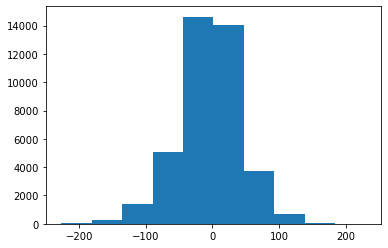

In [8]:
plt.hist(nope['NOPE'])

NOPE Full Sample Distribution
mu:  -4.108358664885755
sd:  46.91198362400756
Confidence Interval (95)%:[-96.05584656794058,87.83912923816906]


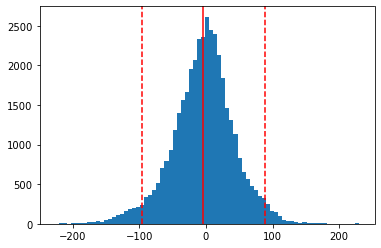

In [14]:
plt.hist(nope['NOPE'], bins = 75)
x_bar = np.mean(nope['NOPE'])
sd =  np.std(nope['NOPE'])
lower = x_bar - 1.96*sd
upper = x_bar + 1.96*sd
print('NOPE Full Sample Distribution')
print('mu: ', x_bar)
print('sd: ', sd)
print('Confidence Interval (95)%:[{},{}]'.format(lower,upper))
plt.axvline(x=x_bar, color = 'r', linestyle='-')
plt.axvline(x=lower, color = 'r', linestyle='--')
plt.axvline(x=upper, color = 'r', linestyle='--')

In [190]:
## NOPE Bootstrapping

import random
from scipy.stats import norm, kurtosis
import scipy

#bootstrap
NOPE = nope['NOPE']
n = 10000
NOPE_mu_hat = []
NOPE_std_error = []
NOPE_kurt_hat = []
NOPE_skew_hat = []
NOPE_autocorr_hat = []
NOPE_min_hat = []
NOPE_max_hat = []
NOPE_2sigma_up = []
NOPE_2sigma_down = []
NOPE_pct_change_mu_hat = []

for i in range(n):
    x = np.random.choice(NOPE, size=len(NOPE), replace=True, p=None)
    NOPE_mu_hat.append(np.mean(x))
    NOPE_std_error.append(np.std(x)/np.sqrt(len(NOPE)))
    NOPE_kurt_hat.append(scipy.stats.kurtosis(x))
    NOPE_skew_hat.append(scipy.stats.skew(x))
    NOPE_min_hat.append(min(x))
    NOPE_max_hat.append(max(x))
    NOPE_2sigma_up.append(np.percentile(x,95))
    NOPE_2sigma_down.append(np.percentile(x,5))

x_bar:  -4.113830789115825
std_error:  0.23637507788238823
Mu Confidence Interval (95)%:[-4.577125941765306,-3.650535636466344]


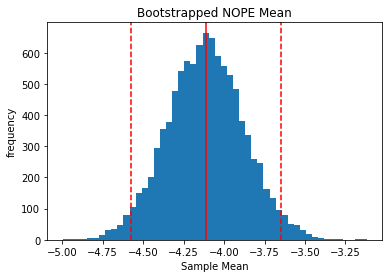

In [191]:
plt.hist(NOPE_mu_hat, bins = 50)
plt.title('Bootstrapped NOPE Mean')
plt.xlabel('Sample Mean')
plt.ylabel('frequency')
mean = np.mean(NOPE_mu_hat)


std_error =  np.std(NOPE_mu_hat)#/np.sqrt(len(NOPE_mu_hat))
lower = mean - 1.96*std_error
upper = mean + 1.96*std_error

print('x_bar: ', mean)
print('std_error: ', std_error)
print('Mu Confidence Interval (95)%:[{},{}]'.format(lower,upper))

plt.axvline(x=mean, color = 'r', linestyle='-')
plt.axvline(x=lower, color = 'r', linestyle='--')
plt.axvline(x=upper, color = 'r', linestyle='--')

x_bar:  0.23443751377529692
std_error:  0.0010459849130582597
Mu Confidence Interval (95)%:[0.23238738334570275,0.2364876442048911]


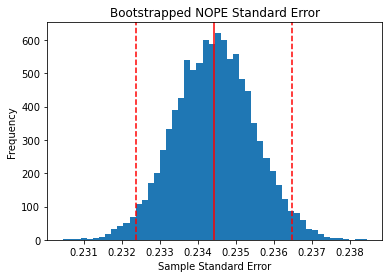

In [192]:
plt.hist(NOPE_std_error, bins = 50)
plt.title('Bootstrapped NOPE Standard Error')
plt.xlabel('Sample Standard Error')
plt.ylabel('Frequency')
mean = np.mean(NOPE_std_error)

std_error =  np.std(NOPE_std_error)#/np.sqrt(len(NOPE_mu_hat))
lower = mean - 1.96*std_error
upper = mean + 1.96*std_error

print('x_bar: ', mean)
print('std_error: ', std_error)
print('Mu Confidence Interval (95)%:[{},{}]'.format(lower,upper))

plt.axvline(x=mean, color = 'r', linestyle='-')
plt.axvline(x=lower, color = 'r', linestyle='--')
plt.axvline(x=upper, color = 'r', linestyle='--')

x_bar:  1.1437149933114181
std_error:  0.05394544863847341
Mu Confidence Interval (95)%:[1.0379819139800102,1.249448072642826]


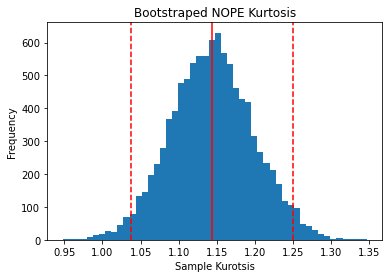

In [193]:
plt.hist(NOPE_kurt_hat, bins = 50)
plt.title('Bootstraped NOPE Kurtosis')
plt.xlabel('Sample Kurotsis')
plt.ylabel('Frequency')
mean = np.mean(NOPE_kurt_hat)

std_error =  np.std(NOPE_kurt_hat)#/np.sqrt(len(NOPE_mu_hat))
lower = mean - 1.96*std_error
upper = mean + 1.96*std_error

print('x_bar: ', mean)
print('std_error: ', std_error)
print('Mu Confidence Interval (95)%:[{},{}]'.format(lower,upper))

plt.axvline(x=mean, color = 'r', linestyle='-')
plt.axvline(x=lower, color = 'r', linestyle='--')
plt.axvline(x=upper, color = 'r', linestyle='--')

x_bar:  -0.2255608321395765
std_error:  0.020721067194253713
Mu Confidence Interval (95)%:[-0.2661741238403138,-0.18494754043883924]


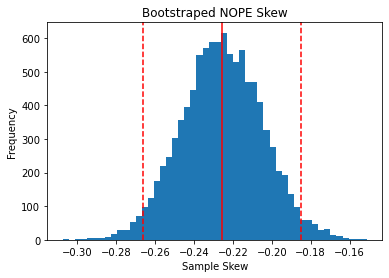

In [194]:
plt.hist(NOPE_skew_hat, bins = 50)
plt.title('Bootstraped NOPE Skew')
plt.xlabel('Sample Skew')
plt.ylabel('Frequency')
mean = np.mean(NOPE_skew_hat)

std_error =  np.std(NOPE_skew_hat)#/np.sqrt(len(NOPE_mu_hat))
lower = mean - 1.96*std_error
upper = mean + 1.96*std_error

print('x_bar: ', mean)
print('std_error: ', std_error)
print('Mu Confidence Interval (95)%:[{},{}]'.format(lower,upper))

plt.axvline(x=mean, color = 'r', linestyle='-')
plt.axvline(x=lower, color = 'r', linestyle='--')
plt.axvline(x=upper, color = 'r', linestyle='--')

In [53]:
# End of Day Analysis
nope['Human Time'] = pd.to_datetime(nope['Human Time'])

eod_df = nope.copy()
x = [eod_df.iloc[i] for i in range(len(eod_df)) if eod_df.iloc[i][0].hour == 15 and 55 <= eod_df.iloc[i][0].minute <= 60 and eod_df.iloc[i][0].year == 2021]
eod_df_2021 = pd.DataFrame(x)

In [54]:
eod_df_2021

,Human Time,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price,Symbol
18864,2021-01-04 15:55:00,78929513.9,-96306424.5,85523364.0,-20.318320,368.955,SPY
18865,2021-01-04 15:59:00,62522112.2,-101687021.3,92396110.0,-42.388050,368.820,SPY
19401,2021-01-05 15:55:00,33421822.6,-43993836.4,50868207.0,-20.783146,371.490,SPY
19402,2021-01-05 15:55:00,32884679.7,-44841005.8,50885818.0,-23.496382,371.505,SPY
19403,2021-01-05 15:55:00,32879645.8,-45036922.4,51238909.0,-23.726650,371.445,SPY
...,...,...,...,...,...,...,...
40044,2021-03-19 15:55:00,76942255.8,-64111831.3,86464638.0,14.838927,390.565,SPY
40045,2021-03-19 15:56:00,71824953.5,-68750965.8,87490119.0,3.513526,390.335,SPY
40046,2021-03-19 15:57:00,69200796.4,-71552263.1,88102119.0,-2.669024,390.215,SPY
40047,2021-03-19 15:58:00,71552689.7,-69868718.8,89427467.0,1.883058,390.145,SPY


(array([20., 20., 47., 53., 30., 39., 15., 14., 27., 10.]),
 array([-106.2322554 ,  -82.65983877,  -59.08742214,  -35.51500551,
         -11.94258888,   11.62982775,   35.20224438,   58.77466101,
          82.34707763,  105.91949426,  129.49191089]),
 <BarContainer object of 10 artists>)

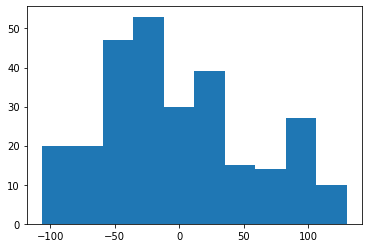

In [55]:
plt.hist(eod_df_2020['NOPE'])

In [197]:
# machine learning models

# OLS

# Ridge/Lasso

# Decision Tree

# Unsupervised?

In [198]:
# trading strategies

# Mean Reversion
    # Nope 2 Sigma
    # Moving Avg Cross
    # Hurst
    # Bollinger
    
    #Puts or Short Spot on Bear
    #Calls, Vert Spread or Spot on Bull

In [199]:
# backtests